# Importing Library

In [38]:
import pandas as pd 
from pandas import Grouper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline
import re
import calendar

# Importing Data

In [39]:
path = r'C:\Users\simpe\Citi Bike Analysis'

In [40]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_3.csv'), index_col = False)

In [41]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01


In [42]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             42993 non-null  int64  
 1   Unnamed: 0               42993 non-null  int64  
 2   day_of_week              42993 non-null  object 
 3   start_hour               42993 non-null  int64  
 4   start_station_id         42993 non-null  int64  
 5   start_station_name       42993 non-null  object 
 6   start_station_latitude   42993 non-null  float64
 7   start_station_longitude  42993 non-null  float64
 8   end_station_id           42993 non-null  int64  
 9   end_station_name         42993 non-null  object 
 10  end_station_latitude     42993 non-null  float64
 11  end_station_longitude    42993 non-null  float64
 12  trip_duration            42993 non-null  int64  
 13  subscriber               42993 non-null  object 
 14  birth_year            

In [43]:
# Define data types for specific columns
data_types = {
    'start_time': 'datetime64',
    'end_time': 'datetime64'
}

In [44]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             42993 non-null  int64  
 1   Unnamed: 0               42993 non-null  int64  
 2   day_of_week              42993 non-null  object 
 3   start_hour               42993 non-null  int64  
 4   start_station_id         42993 non-null  int64  
 5   start_station_name       42993 non-null  object 
 6   start_station_latitude   42993 non-null  float64
 7   start_station_longitude  42993 non-null  float64
 8   end_station_id           42993 non-null  int64  
 9   end_station_name         42993 non-null  object 
 10  end_station_latitude     42993 non-null  float64
 11  end_station_longitude    42993 non-null  float64
 12  trip_duration            42993 non-null  int64  
 13  subscriber               42993 non-null  object 
 14  birth_year            

In [45]:
#date time conversion
file_path = os.path.join(path, '02 Data','prepared data','citi_3.csv')

In [46]:
parse_dates = ['ride_start', 'ride_end']

In [47]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [48]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   day_of_week              42993 non-null  object        
 3   start_hour               42993 non-null  int64         
 4   start_station_id         42993 non-null  int64         
 5   start_station_name       42993 non-null  object        
 6   start_station_latitude   42993 non-null  float64       
 7   start_station_longitude  42993 non-null  float64       
 8   end_station_id           42993 non-null  int64         
 9   end_station_name         42993 non-null  object        
 10  end_station_latitude     42993 non-null  float64       
 11  end_station_longitude    42993 non-null  float64       
 12  trip_duration            42993 n

In [49]:
citi['ride_start_date'] = citi['ride_start'].dt.date
citi['ride_start_time'] = citi['ride_start'].dt.time

In [50]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01


In [51]:
#seeing how many rides are in an hour
citi['start_hour'].value_counts(dropna=False)

start_hour
17    4398
18    4280
8     3127
16    3046
19    2930
9     2598
15    2436
13    2408
14    2401
12    2353
7     1980
20    1932
11    1841
10    1827
21    1371
22    1159
6      889
23     803
0      420
1      266
5      195
2      162
3       96
4       75
Name: count, dtype: int64

In [52]:
#wanting to see rides per day using group function
rides_per_day=citi.groupby(citi['ride_start'].dt.date).size()

In [53]:
rides_per_day

ride_start
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
dtype: int64

In [54]:
# number of rides each day
citi['ride_start_date'].value_counts(dropna=False)

ride_start_date
2013-09-20    1777
2013-09-26    1742
2013-09-24    1728
2013-09-13    1701
2013-09-18    1681
2013-09-25    1679
2013-09-30    1666
2013-09-17    1658
2013-09-10    1646
2013-09-19    1634
2013-09-27    1594
2013-09-11    1587
2013-09-23    1557
2013-09-04    1543
2013-09-06    1522
2013-09-09    1487
2013-09-05    1435
2013-09-12    1401
2013-09-03    1397
2013-09-16    1344
2013-09-28    1329
2013-09-15    1239
2013-09-21    1228
2013-09-08    1206
2013-09-07    1205
2013-09-14    1203
2013-09-29    1162
2013-09-22    1121
2013-09-01     778
2013-09-02     743
Name: count, dtype: int64

In [55]:
# avg hour rides occurs each day
citi.groupby('ride_start_date').agg({'start_hour':['mean']})

,start_hour
,mean
ride_start_date,
2013-09-01,14.597686
2013-09-02,14.352624
2013-09-03,14.324982
2013-09-04,13.953986
2013-09-05,14.157491
2013-09-06,13.992773
2013-09-07,14.350207
2013-09-08,14.338308


In [56]:
#avg hour rides occur by day of week
citi.groupby('day_of_week').agg({'start_hour':['mean']})

,start_hour
,mean
day_of_week,
Fri,13.925993
Mon,14.282478
Sat,14.136757
Sun,14.370687
Thu,13.817933
Tue,14.108259
Wed,13.992450


# Saving DF to CSV

In [57]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_3.csv'))

In [58]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01


In [59]:
# make a subset 
sub=citi[['start_hour','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','trip_duration','birth_year',]]

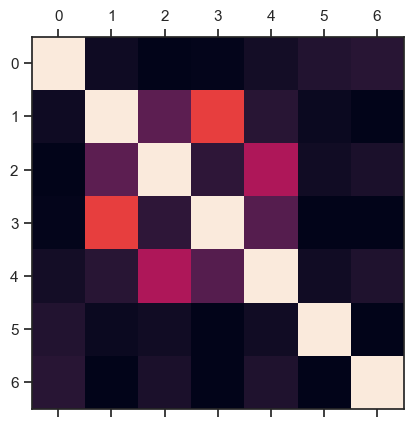

(<matplotlib.image.AxesImage at 0x28ea977a610>, None)

In [60]:
# making a correlation heatmap using matplotlib with most practical variables
plt.matshow(sub.corr()),plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

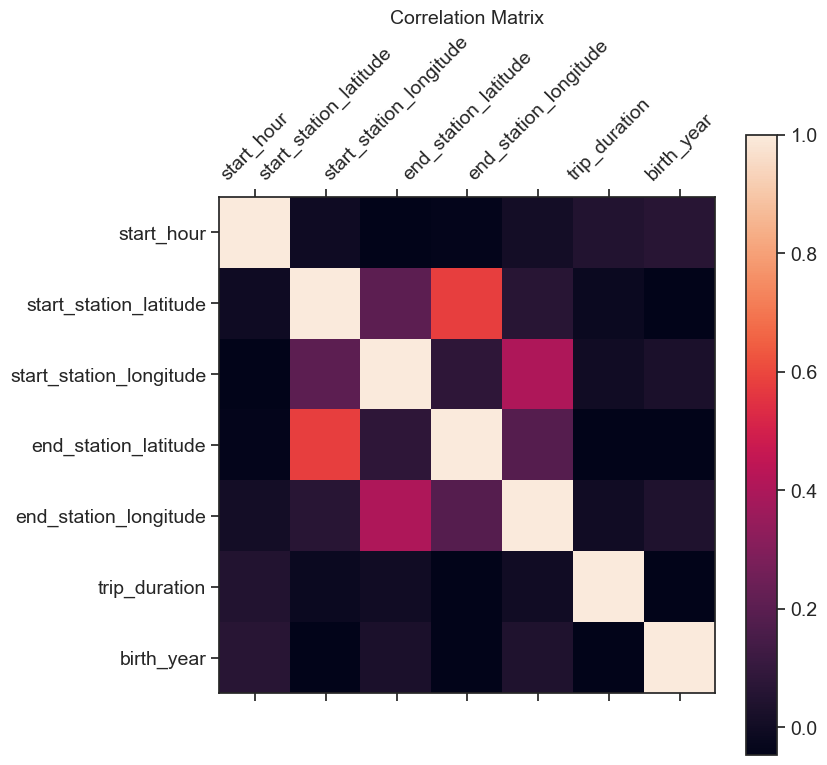

In [61]:
# add labels and legend
f= plt.figure(figsize=(8,8))
# figure size
plt.matshow(sub.corr(), fignum=f.number)
# type of plot
plt.xticks(range(sub.shape[1]),sub.columns, fontsize=14, rotation=45)
#x axis labels
plt.yticks(range(sub.shape[1]),sub.columns, fontsize=14)
# y axis labels
cb=plt.colorbar()
# add a color legend
cb.ax.tick_params(labelsize=14)
# add a font size
plt.title('Correlation Matrix',fontsize=14)
# add title

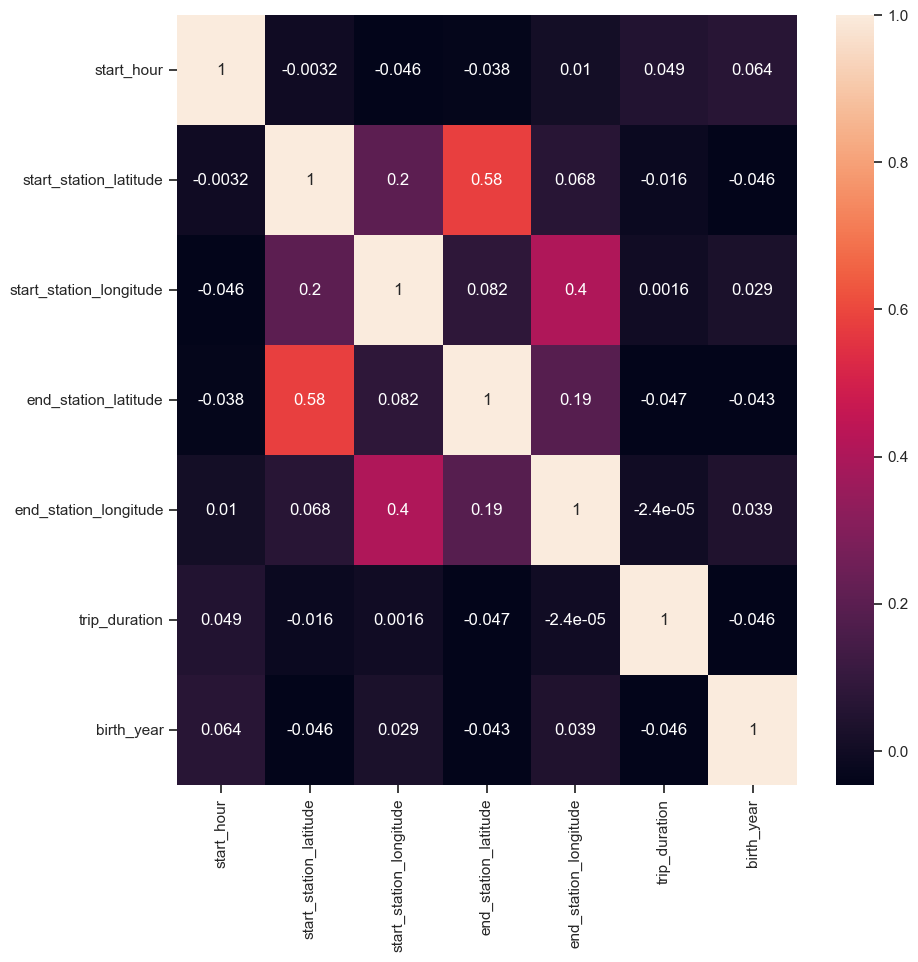

In [62]:
#subplot in matplot lib
f,ax=plt.subplots(figsize=(10,10))
#create the correlationheat map in seaborn by applying a heatmap onto the correlation matrix
corr=sns.heatmap(sub.corr(), annot = True, ax=ax)

In [63]:
# smaller pair plot
sub_1=citi[['start_hour','trip_duration','birth_year']]

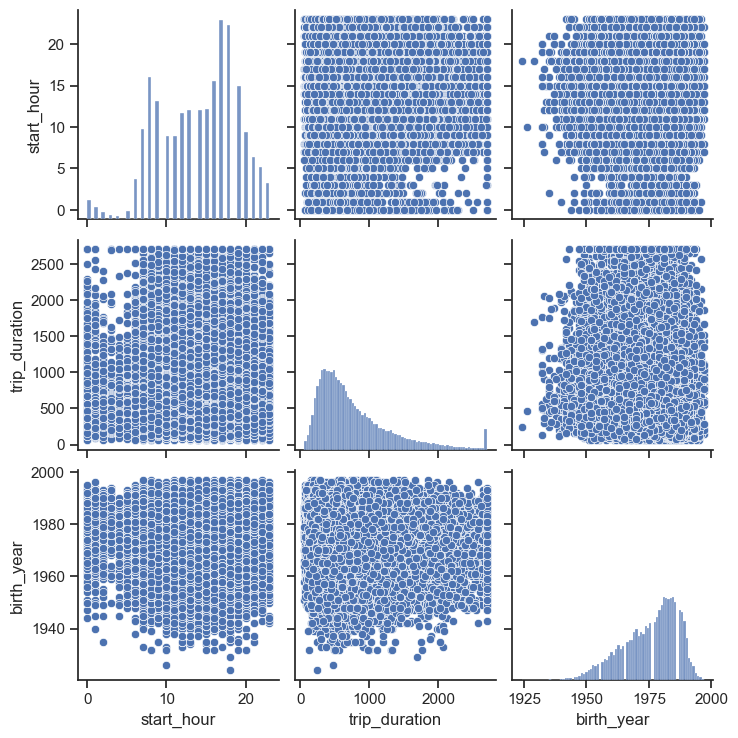

In [64]:
# create a pair plot of selected variables
g=sns.pairplot(sub_1)

In [65]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01


In [66]:
# avg trip duration for start hour
citi.groupby('start_hour').agg({'trip_duration':['mean','min','max']})

trip_duration          
                    mean min   max
start_hour                        
0             748.716667  63  2697
1             702.657895  95  2697
2             659.561728  69  2403
3             687.020833  82  2697
4             667.106667  90  2697
5             605.348718  81  2697
6             648.613048  62  2697
7             727.038384  62  2697
8             756.595459  60  2697
9             728.346035  64  2697
10            745.684729  66  2697
11            760.065182  60  2697
12            732.083723  71  2697
13            748.196844  63  2697
14            788.499792  60  2697
15            784.350575  62  2697
16            809.883454  62  2697
17            822.308322  60  2697
18            826.911215  64  2697
19            782.310580  63  2697
20            776.412526  68  2697
21            771.610503  62  2697
22            742.789474  61  2697
23            730.199253  60  2697

In [67]:
# avg min and max start hour for day of week
citi.groupby('day_of_week').agg({'start_hour':['mean','min','max']})

start_hour        
                  mean min max
day_of_week                   
Fri          13.925993   0  23
Mon          14.282478   0  23
Sat          14.136757   0  23
Sun          14.370687   0  23
Thu          13.817933   0  23
Tue          14.108259   0  23
Wed          13.992450   0  23

In [68]:
# avg min maxstart hour by day
citi.groupby('ride_start_date').agg({'start_hour':['mean','min','max']})

start_hour        
                      mean min max
ride_start_date                   
2013-09-01       14.597686   0  23
2013-09-02       14.352624   0  23
2013-09-03       14.324982   0  23
2013-09-04       13.953986   0  23
2013-09-05       14.157491   0  23
2013-09-06       13.992773   0  23
2013-09-07       14.350207   0  23
2013-09-08       14.338308   0  23
2013-09-09       14.071957   0  23
2013-09-10       14.222357   0  23
2013-09-11       13.788280   0  23
2013-09-12       13.111349   0  23
2013-09-13       13.711346   0  23
2013-09-14       14.174564   0  23
2013-09-15       14.255851   0  23
2013-09-16       14.607143   0  23
2013-09-17       13.979493   0  23
2013-09-18       14.157644   0  23
2013-09-19       14.074663   0  23
2013-09-20       14.019696   0  23
2013-09-21       13.780945   0  23
2013-09-22       14.796610   0  23
2013-09-23       14.339114   0  23
2013-09-24       13.947917   0  23
2013-09-25       14.055390   0  23
2013-09-26       13.865672   0  23
2013-09-27       13.986826   0  23
2013-09-28       14.237773   0  23
2013-09-29       13.963855   0  23
2013-09-30       14.124250   0  23

In [69]:
# seeing if different stations vary based on day
citi.groupby('start_station_id').agg({'trip_duration':['mean','min','max']})

trip_duration           
                          mean  min   max
start_station_id                         
72                  942.550633   64  2697
79                  941.786885  156  2697
82                  745.220339   68  2109
83                  897.402778  142  2613
116                 643.992565   87  2697
...                        ...  ...   ...
2017                950.944444   98  2697
2021                662.913333   92  2697
2022               1012.041667  215  2596
2023                895.945946  171  2674
3002                893.024631   68  2697

[330 rows x 3 columns]

# Saving Data

In [70]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_4.csv'))

In [71]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             42993 non-null  int64         
 1   Unnamed: 0               42993 non-null  int64         
 2   day_of_week              42993 non-null  object        
 3   start_hour               42993 non-null  int64         
 4   start_station_id         42993 non-null  int64         
 5   start_station_name       42993 non-null  object        
 6   start_station_latitude   42993 non-null  float64       
 7   start_station_longitude  42993 non-null  float64       
 8   end_station_id           42993 non-null  int64         
 9   end_station_name         42993 non-null  object        
 10  end_station_latitude     42993 non-null  float64       
 11  end_station_longitude    42993 non-null  float64       
 12  trip_duration            42993 n

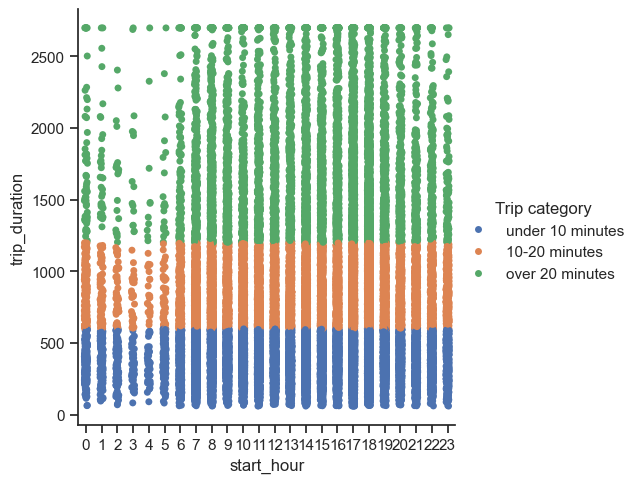

In [72]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g=sns.catplot(x="start_hour", y= "trip_duration", hue="Trip category", data=citi)

# Saving CSV and Exporting DF

In [73]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_4.csv'))